# Probabilidades y Distribuciones

## Definición de probabilidad

Vamos a determinar la probabilidad de que ocurra un solo evento, como que una moneda caiga cruz. Para calcular esta probabilidad, divide el número de posibles resultados de eventos por el espacio muestral.

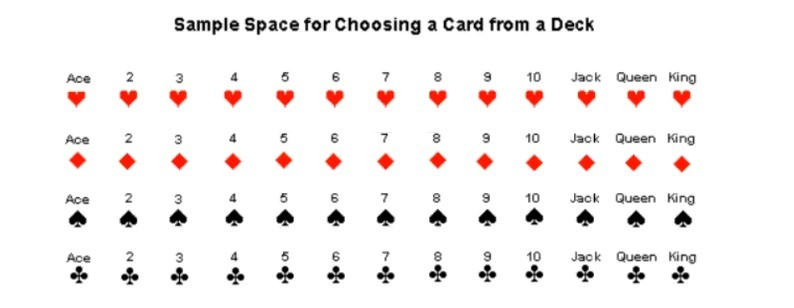

In [1]:
# Espacio muestral
cards = 52 

# Resultados
aces = 4 

# Diviendo posibles resultados por el espacio muestral
ace_probability = aces / cards

# Imprimimos la probabilidad con 2 decimales
print(str(round(ace_probability*100,1)) + '%')


7.7%


Ahora que ha visto este ejemplo de cálculo de probabilidades, es fácil suponer que podría construir sus cáculos de probabilidad para determinar, por ejemplo, la probabilidad de sacar una carta que sea un Corazón, una carta con rostro (como Jotas, Reinas, o Reyes), como una Reina de Corazones. 

En tales casos, es posible que desee crear una función ``event_probability`` a la que pase el ``event_outcomes`` y el ``sample_space`` para encontrar la probabilidad de un evento en forma de porcentaje, ya que reutilizará gran parte del código:

In [2]:
# Funcion que retorna el calculo de probabilidad
## event_outcomes: eventos aleatorio
## sample_space: espacio muestral

def event_probability(event_outcomes, sample_space):
    probability = (event_outcomes / sample_space) * 100
    return round(probability, 1)

# Sample Space
cards = 52

# Probabilidad para sacar una carta corazón 
hearts = 13
heart_probability = event_probability(hearts, cards)

# Probabilidad para sacar una carta con rostro
face_cards = 12
face_card_probability = event_probability(face_cards, cards)

# Probabilidad de sacar reina de corazones
queen_of_hearts = 1
queen_of_hearts_probability = event_probability(queen_of_hearts, cards)

# calculo
print('Probabilidad de corazón: ' + str(heart_probability) + '%')
print('Probabilidad de carta con cara: ' + str(face_card_probability) + '%')
print('Probabilidad de reina de corazones: ' + str(queen_of_hearts_probability) + '%')

Probabilidad de corazón: 25.0%
Probabilidad de carta con cara: 23.1%
Probabilidad de reina de corazones: 1.9%


## Ley de los grandes números

Si se repite un experimento aleatorio, bajo las mismas condiciones, un número ilimitado de veces; y si estas repeticiones la una de la otra, entonces la frecuencia de veces que un evento A ocurra, convergerá a un número que es igual a la probabilidad de que A ocurra en una sola repetición del experimento.


In [2]:
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np #importando numpy
import pandas as pd #importando pandas
import scipy.stats as ss #importando scipy.stats

np.random.seed(2131982) # para poder replicar el random

%matplotlib inline

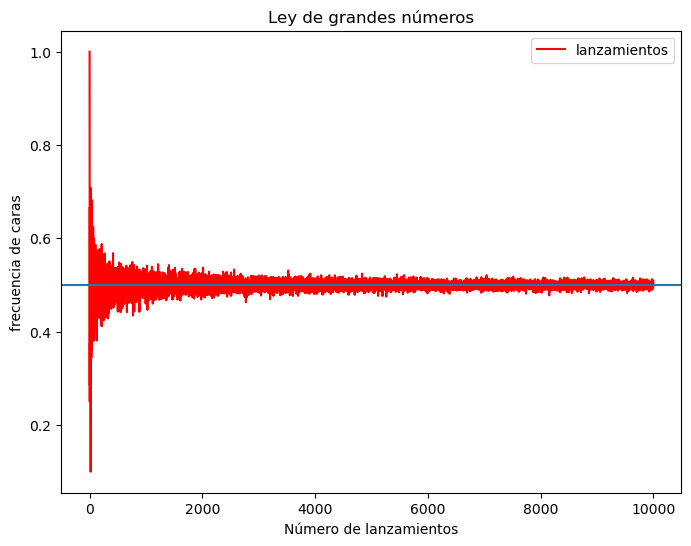

In [4]:
# Ejemplo ley de grandes números
# moneda p=1/2 cara=1 sello=0
resultados = []
for lanzamientos in range(1, 10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[1/2, 1/2])
    caras = lanzamientos.mean()
    resultados.append(caras)
    
# graficamente
df = pd.DataFrame({'lanzamientos': resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8,6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia de caras")
plt.show()

In [5]:
df

,lanzamientos
0,1.000000
1,0.500000
2,0.333333
3,0.250000
4,0.400000
...,...
9994,0.495848
9995,0.501601
9996,0.510153
9997,0.497099


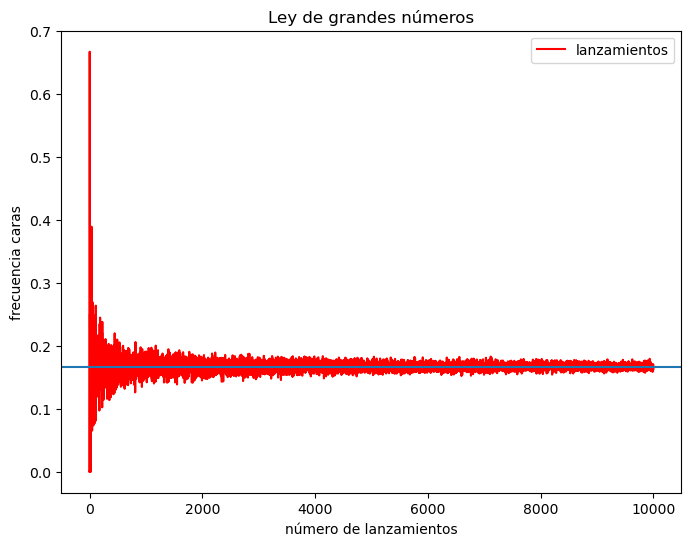

In [6]:
# moneda p=1/6 cara=1 sello=0
resultados = []
for lanzamientos in range(1, 10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[5/6, 1/6])
    caras = lanzamientos.mean()
    resultados.append(caras)
    
# graficamente
df = pd.DataFrame({'lanzamientos':resultados})

df.plot(title='Ley de grandes números', color='r',figsize=(8,6))
plt.axhline(1/6)
plt.xlabel("número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

Como estos ejemplos nos muestran, al comienzo, la frecuencia en que vamos obteniendo caras va variando considerablemente, pero a medida que aumentamos el número de repeticiones, la frecuencia de caras se va estabilizando a la probabilidad del evento. En los gráficos podemos ver claramente el comportamiento de la ley.

## Distribuciones de Probabilidad

Son modelos estadisticos que se pueden ajustar a una variable aleatoria con mejor o peor decisión y que nos dan los valores de probabilidad.

+ cdf(x) - Función de distribución F(x)
+ sf(x) = 1 - cdf(x)
+ pmf(x) - Función de probabilidad f(x) (distribuciones discretas)
+ pdf(x) - Función de densidad f(x) (distribuciones continuas)
+ ppf(x) - Función inversa a cdf(x). Nos permite obtener el valor correspondiente a una probabilidad.

<b>pmf(n)</b> devuelve la probabilidad de que X=N, Pr{X=N} Esto solo tiene sentido en ciertas distribuciones, las discretas, como es el caso de la binomial.

<b>cdf(n)</b> nos permite calcular probabilidades acumuladas hasta N.

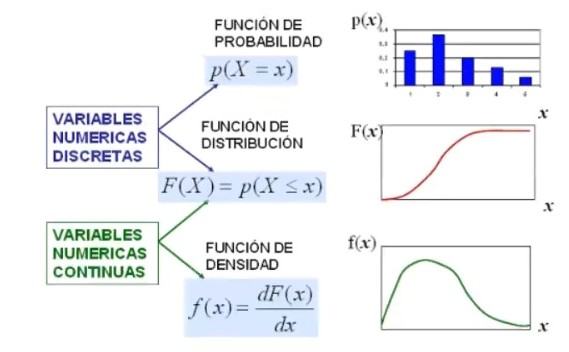

### DISTRIBUCIONES DISCRETAS

### Distribución binomial:

Describe la probabilidad de exactamente r éxitos en N pruebas si la probabilidad de éxito en una sola prueba es p.

<b>Ejemplo1:</b> Una máquina fabrica una determinada pieza y se sabe que produce un 7 por 1000 de piezas defectuosas Halle (a) la probabilidad de que al examinar 50 piezas sólo haya una defectuosa, (b) la probabilidad de que al examinar 50 piezas haya 2 defectuosas o menos, (c) la probabilidad de que al examinar 50 piezas haya más de 2 defectuosas

In [8]:
# de la librería scipy.stats
X = ss.binom(50,7/1000)

# que haya una defectuosa
print(round(X.pmf(1),3))

# P <= 2
print(round(X.cdf(2),3))

# P > 2 
print(round(X.sf(2),3))
print(round(1-X.cdf(2),3))

0.248
0.995
0.005
0.005


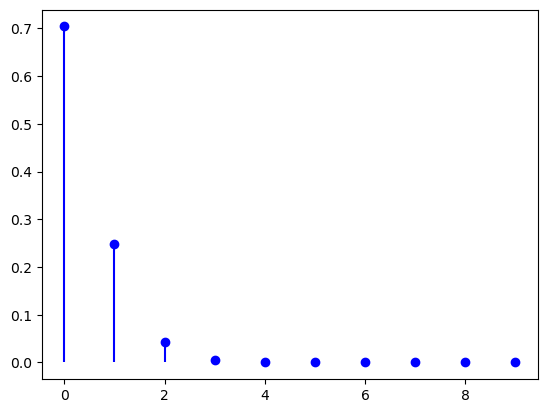

In [9]:
X = ss.binom(50,7/1000)
x = np.arange(10)

plt.plot(x,X.pmf(x),"bo")
plt.vlines(x,0,X.pmf(x),"b")
plt.show()

<b>Ejemplo2</b>: La probabilidad de que el carburador de un coche salga de fábrica defectuoso es del 4 por 100. Hallar: (a)El número de carburadores defectuosos esperados en un lote de 1000 y (b)La varianza  y la desviación tipica

In [10]:
X = ss.binom(1000,4/100)

print(X.mean())
print(X.var())
print(X.std())

40.0
38.4
6.196773353931867


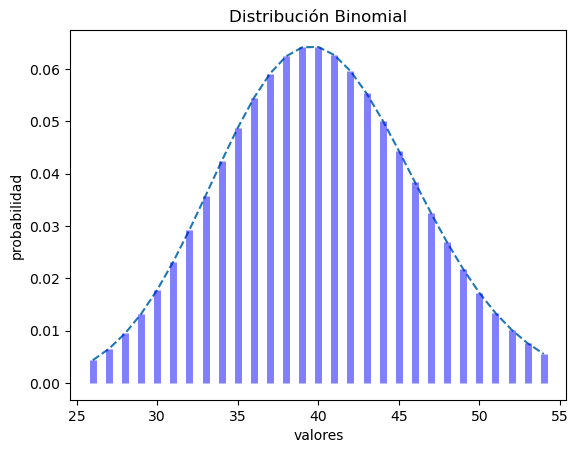

In [11]:
# Graficando Binomial
N, p = 1000, 0.04 #parametros de forma
binomial = ss.binom(N, p) # Dsitribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

<b>Ejemplo3:</b> Un proveedor de DVDs regrabables afirma que solamente el 4% de los artículos suministrados son defectuosos. Si un cliente compra un lote de 25 DVDs.¿Cual es el número esperado de DVDs defectuosos en el lote?

In [12]:
X = ss.binom(25,0.04)
X.mean()

1.0

In [13]:
X.std()

0.9797958971132712

El número de DVDs defectuosos esperados es el equivalente a decir el número medio de DVDs defectuosos. Es decir, de media habría 1 DVD defectuoso en el paquete.

Ahora calculemos la probabilidad de que hubiese 4 o más fallos, Pr{X>=4}.

Una forma de calcularlo es 1-Pr{X<4}. Otra opción seria simplemente obtener la probabilidad de 0 DVDs defectuoso,1 DVD defectuoso, de 2 DVDs defectuoso, de 3 DVDs defectuoso sumarlo y restarlo 1

In [14]:
X = ss.binom(25,0.04)

#forma 1 
print(1 - X.cdf(3))

#forma 2
print(1- sum(X.pmf(x) for x in range(4)))

0.016521575032415914
0.016521575032416136


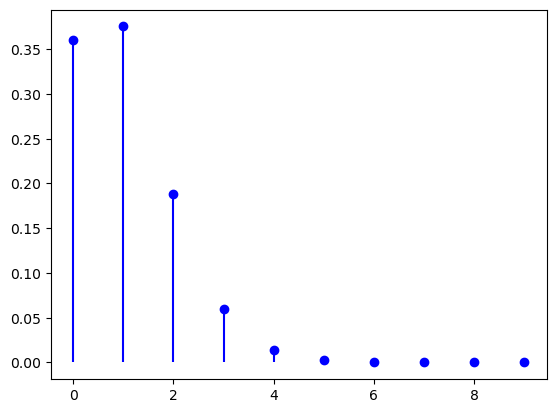

In [15]:
X = ss.binom(25,0.04)
x = np.arange(10)

plt.plot(x,X.pmf(x),"bo")
plt.vlines(x,0,X.pmf(x),"b")
plt.show()


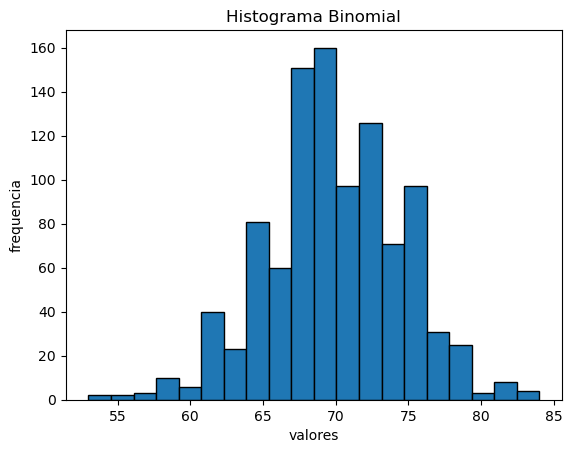

In [17]:
# histomagrama de valores aleatorios binomiales
N, p = 100, 0.7 # parametros de forma
binomial = ss.binom(N, p) #Distribución

aleatorios = binomial.rvs(1000)  # genera aleatorios de distribución binomial
cuenta, cajas, ignorar = plt.hist(aleatorios, 20, edgecolor= 'k')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

### Distribución Poisson:

La distribución de Poisson recoge sucesos independientes que ocurren en un soporte continuo. El número medio de sucesos por unidad de soporte se le conoce como λ  y caracteriza la distribución. poisson nos permite crear distribuciones de este tipo.

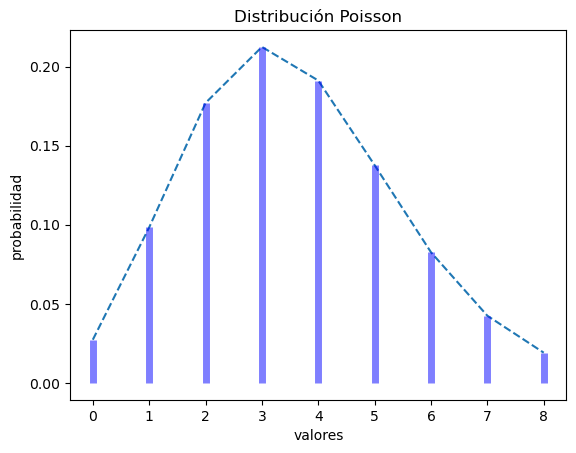

In [18]:
# Graficando Poisson
mu = 3.6 # parametro de forma
poisson = ss.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad 
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

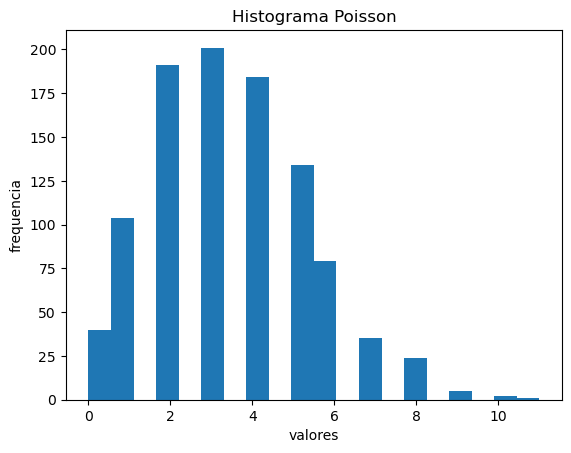

In [22]:
# histograma 
aleatorios = poisson.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

<b>Ejemplo:</b> La impresora de una pequeña red informática recibe una media de 0.1 peticiones por segundo. Suponiendo que las peticiones a dicha impresora son independientes y a ritmo constante, ¿cuál es la probabilidad de un máximo de 2 peticiones en un segundo? Si la cola de la impresora tiene un comportamiento deficiente cuando recibe más de 10 peticiones en un minuto, ¿cuál es la probabilidad de que ocurra esto?

In [23]:
X = ss.poisson(0.1)
X.cdf(2)

0.9998453469297354

In [24]:
Y = ss.poisson(6) #porque 0.1 peticiones por segundo son 6 peticiones por minuto
Y.sf(10)

0.042620923582538

La probabilidad de que la impresora tenga defectos es de 4.2%

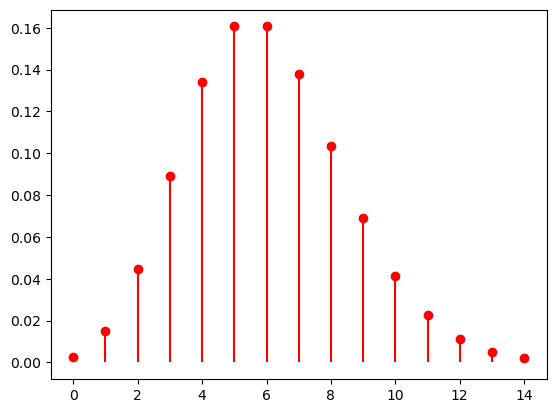

In [25]:
X = ss.poisson(6)
x = np.arange(15) 

plt.plot(x,X.pmf(x), "ro")
plt.vlines(x,0,X.pmf(x),"r")
plt.show()

### DISTRIBUCIONES CONTINUAS

Probablemente el modelo de distribución más usado y conocido. Lo usamos para describir variables reales continuas.

Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la Distribución Normal son:

+ características morfológicas de individuos, como la estatura
+ características sociológicas, como el consumo de cierto producto por un mismo grupo de individuos
+ características psicológicas, como el coeficiente intelectual
+ nivel de ruido de telecomunicaciones
+ errores cometidos al medir ciertas magnitudes

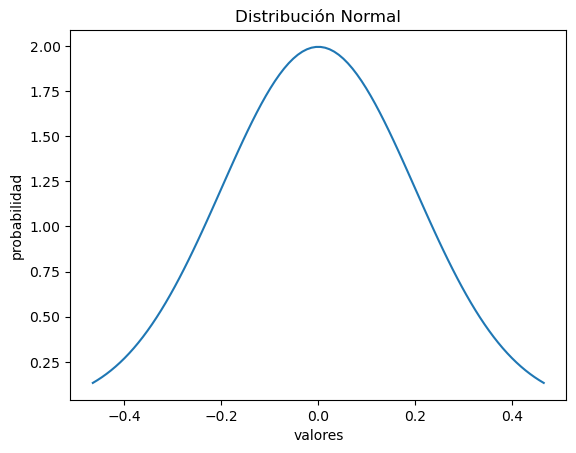

In [27]:
# Graficando Normal 
mu, sigma = 0, 0.2 # media y desvio estandar 
normal = ss.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

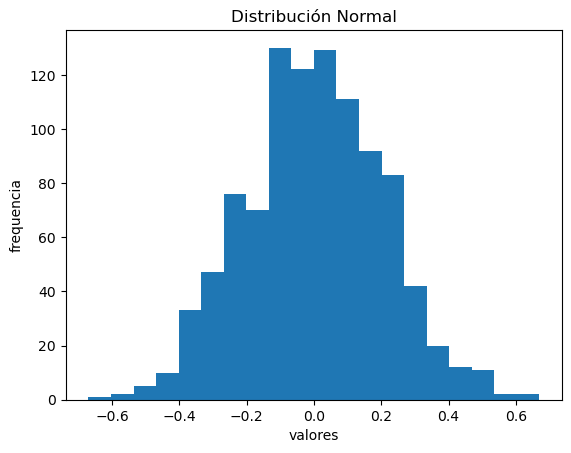

In [35]:
# histograma
aleatorios = normal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Distribución Normal')
plt.show()

<b>Ejemplo:</b> La duración de un determinado componente electrónico, en horas, es una v.a. que se distribuye según una N(2000,40). ¿Cuál es la probabilidad de que la duración de una de esas componenetes sea superior a 1900 horas? ¿y de que esté entre 1850 y 1950 horas?

In [36]:
X = ss.norm(2000,40)
X.sf(1900)

0.9937903346742238

In [37]:
X.cdf(1950) - X.cdf(1850)

0.10556135638165455

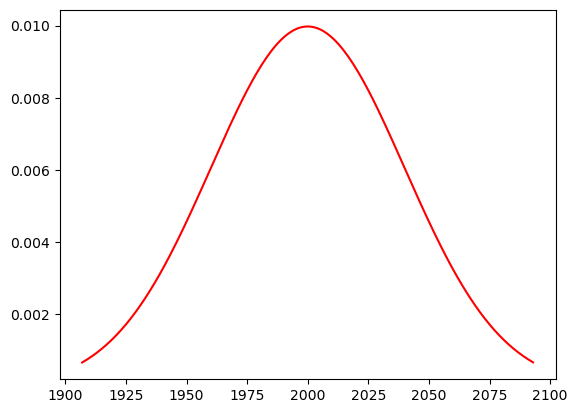

In [39]:
X = ss.norm(2000,40)
x = np.arange(X.ppf(0.01),X.ppf(0.99))

plt.plot(x,X.pdf(x),"r")
plt.show()

<b>Ejemplo:</b> Un técnico realiza un test de cien ítems a unos doscientos opositores. Suponiendo que las puntuaciones X obtenidas por los opositores siguen una distribución normal de media 60 puntos y desviación típica 10 puntos. Cuál es la probabilidad de que haya 70 puntos a mas para los opositores

In [40]:
X = ss.norm(60,10)

# P(X >= 70)
X.sf(70)

0.15865525393145707

In [41]:
# P(X <= 80)
X.cdf(80)

0.9772498680518208

In [42]:
# P(39 <= X <= 80)
X.cdf(80) - X.cdf(39)

0.9593854474890042

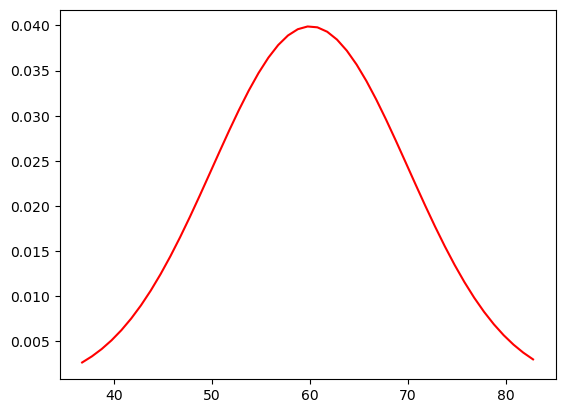

In [43]:
x = np.arange(X.ppf(0.01),X.ppf(0.99))

plt.plot(x,X.pdf(x),"r")
plt.show()

<b>Ejemplo:</b>El número de ventas diarias de un quiosco de periódicos se distribuye con media 30 y varianza 2. Determinar:

a) Probabilidad de que un día se vendan entre 13 y 31 periódicos

b) Determinar el número de periódicos que se venden en el 90% de las ocasiones

In [44]:
X = ss.norm(30,np.sqrt(2))

# Parte a 
X.cdf(31) - X.cdf(13)

0.7602499389065233

In [45]:
# Parte b: P(X <= k) = 0,90
X.ppf(0.9)

31.812387604873646

## Distribución Chi Cuadrado:

Una importante aplicación de la Dsitribución Chi cuadrado es que cuando un conjunto de datos es representado por un modelo teórico, esta distribución puede ser utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados (Independencia de variables)

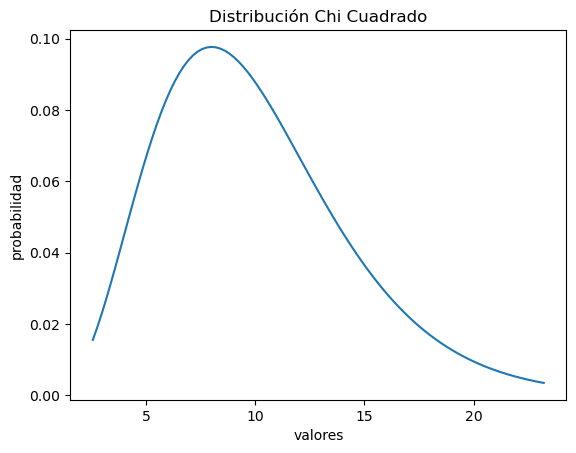

In [46]:
# Graficando Chi cuadrado 
df = 10 # parametro de forma.
chi2 = ss.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi Cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

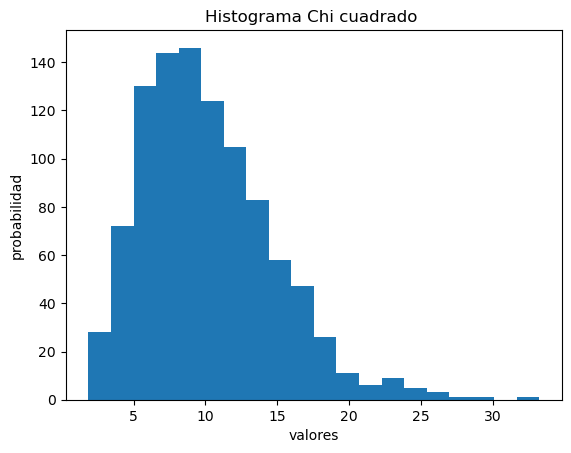

In [47]:
# histograma 
aleatorios = chi2.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado ')
plt.show()

## Distribución t de Student:

La Distribución t de Student es utilizada para probar si la diferencia entre las medias de dos muestras de observaciones es estadísticamente significativa. Por ejemplo, las alturas de una muestra aleatoria de lso jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta distribución nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

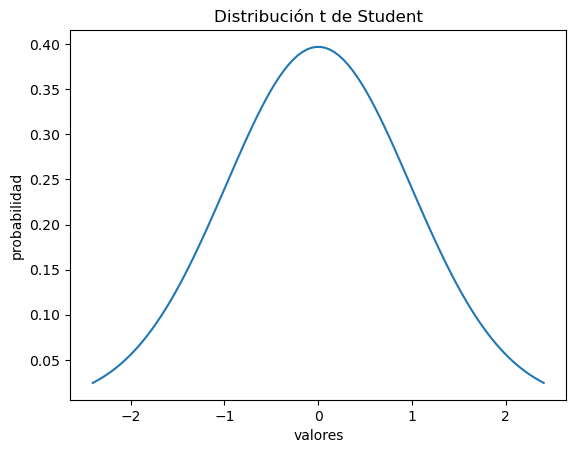

In [48]:
# Graficando t de Student
df = 50 # parametro de la forma.
t = ss.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

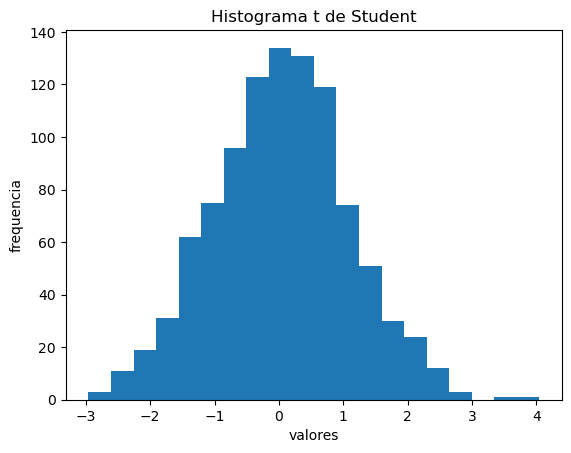

In [49]:
# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma t de Student')
plt.show()

## Distribución F de Fisher:

Esta distribución es utilizada para realizar análisis de varianza (ANOVA).

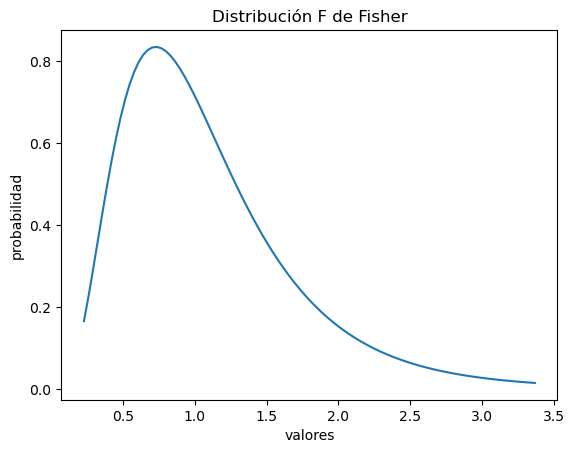

In [50]:
# Graficando distribución F
df1 = 10 # parametro de forma.
df2 = 20 # parametro de forma.
t = ss.f(df1,df2)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) #Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución F de Fisher')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

## Teorema del límite central 

Este teorema establece que la suma o el promedio de casi cualquier conjunto de variables independientes generadas al azar se aproximan  a la Dsitribucion Normal. Esto explica por qué la Distribución Normal surge tan comúnmente y por qué es generalmente una aproximación excelente para la media de casi cualquier colección de datos. Este notable hallazgo se mantiene verdadero sin importar la forma que adopte la distribución de datos que tomemos.

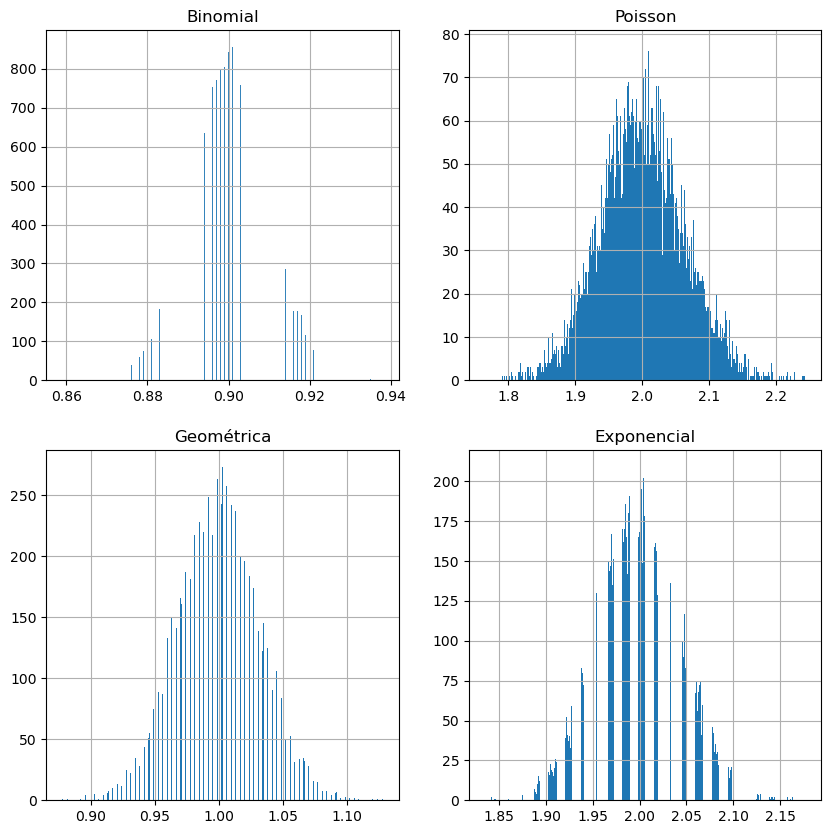

In [67]:
# Ejemplo teorema del límite central
muestra_binomial = []
muestra_exp = []
muestra_possion = []
muestra_geometric = []
mu = .9
lam = 1.0
size =1000

for i in range(1,20000):
    muestra = np.random.binomial(1, mu, size=size)
    muestra_binomial.append(muestra.mean())
    muestra = np.random.exponential(scale=2.0,size=size)
    muestra_exp.append(muestra.mean())
    muestra = np.random.geometric(p=.5, size=size)
    muestra_geometric.append(muestra.mean())
    muestra = np.random.poisson (lam=lam, size=size)
    muestra_possion.append(muestra.mean())
    
df = pd.DataFrame( { 'binomial' : muestra_binomial,
                     'poission': muestra_possion,
                     'geometrica': muestra_geometric,
                     'exponencial': muestra_exp})

fig, axes = plt.subplots(nrows=2, ncols=2 ,figsize=(10,10))
df.binomial.hist(ax=axes[0,0], alpha=0.9, bins=1000)
df.exponencial.hist(ax=axes[0,1],bins=1000)
df.poission.hist(ax=axes[1,0],bins=1000)
df.geometrica.hist(ax=axes[1,1],bins=1000)

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geométrica')
axes[1,1].set_title('Exponencial')
plt.show()

<b>Ejemplo:</b> Un banco recibe un promedio de cheques falsos al día, suponiendo que el número de cheques falsos sigue una distribución de Poisson. Se pide la probabilidad de que se reciban más de 175 cheques falsos en un mes. Asuma un mes de 30 dias.

In [55]:
# Sea la variable X = "cheques falsos al día", donde X P(lambda = 6)
lam = 6
X = ss.poisson(lam)

In [56]:
X.mean()

6.0

In [57]:
X.var()

6.0

In [58]:
X.std()

2.449489742783178

In [59]:
Z = ss.norm(30*X.mean(), X.std()*np.sqrt(30))
Z.sf(175)

0.6453059424928869

<b>Ejemplo 2:</b> La utilización de la tarjeta VISA en operaciones comerciales, en la población de una gran ciudad, sigue en porcentajes una distribución normal de media 4,5 y desviación típica 0,5. Se pide calcular las siguientes probabilidades:

1) Que un ciudadano tomando al azar utilice la tarjeta más del 5% en sus operaciones

2) Tanto por ciento de la ciudad que utiliza la tarjeta menos del 3.5%

3) Porcentaje de operaciones con tarjeta que ultiliza el 20% más alto de la población

4) Porcentaje de operaciones con tarjeta que utiliza el 10% más bajo de la población

5) Porcentaje de operaciones del 80% más próximo de la media

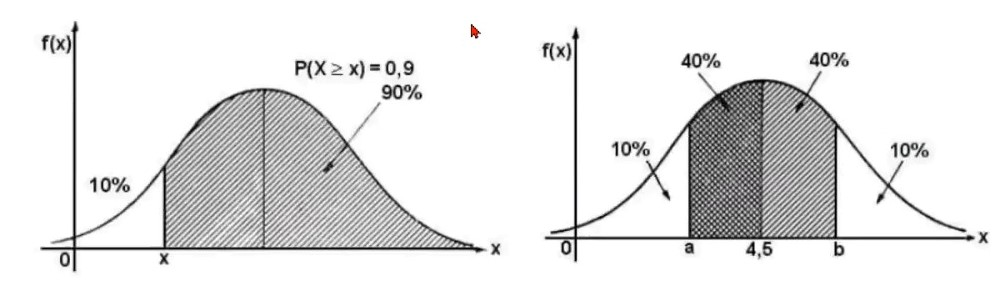

In [60]:
mu = 4.5
sigma = 0.5
X = ss.norm(mu,sigma)

# 1) P(X>5)
X.sf(5)

0.15865525393145707

In [61]:
# 2) P(X < 3.75)
X.cdf(3.75)

0.06680720126885807

In [62]:
# 3) P(X > t) = 0.2 --> P(X < t) = 0.8
X.ppf(0.8)

4.920810616786457

In [63]:
# 4) P(X < a) = 0.1
X.ppf(0.1)

3.8592242172277

In [64]:
# 5 P(a < X <b) = 0.8
X.ppf(0.1) # calculo a

3.8592242172277

In [65]:
X.ppf(0.9) # calculo b 

5.1407757827723